In [80]:
from preprocess import *
import matplotlib.pyplot as plt
from c_models import *

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

download the file from https://figshare.com/collections/A_large_electroencephalographic_motor_imagery_dataset_for_electroencephalographic_brain_computer_interfaces/3917698

# Input

In [3]:
file_name = "CLA-SubjectJ-170504-3St-LRHand-Inter"

In [4]:
f1 = "rawData/" + file_name + ".mat"
mat = take_input(f1)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 23 22:30:55 2018',
 '__version__': '1.0',
 '__globals__': [],
 'ans': array([[23.53949045]]),
 'o': array([[(array(['201705041304.32BEA9DD'], dtype='<U21'), array([], dtype='<U1'), array([[620168]], dtype=int32), array([[200]], dtype=uint8), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8), array([[ 0],
        [ 0],
        [ 0],
        ...,
        [92],
        [92],
        [92]], dtype=uint8), array([[ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
        [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
        [ -0. ,  -0. ,  -0. , ...,  -0. ,  -0. ,  -0. ],
        ...,
        [-92.4, -34.8, -14.4, ...,   8.4,   8.4,  -0. ],
        [-84. , -29.4, -16.2, ...,   7.2,  11.4,  -0.6],
        [-84.6, -31.2, -13.2, ...,   6.6,  12. ,  -0. ]]), array([[array(['Fp1'], dtype='<U3')],
        [array(['Fp2'], dtype='<U3')],
        [array(['F3'], dtype='<U

In [5]:
mat['o'][0][0].dtype

dtype([('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')])

In [6]:
idx = 4
markers = get_markers(mat, idx) 

In [84]:
markers.shape

(620168,)

In [82]:
set(markers)

{0, 1, 2, 3}

In [83]:
import collections
collections.Counter(markers)

Counter({0: 467168, 3: 48280, 1: 49130, 2: 55590})

In [7]:
idx = 6
data = get_data(mat, idx)

In [8]:
frame_of_1 = get_trial_frames(data, markers, 1)
frame_of_2 = get_trial_frames(data, markers, 2)
frame_of_3 = get_trial_frames(data, markers, 3)


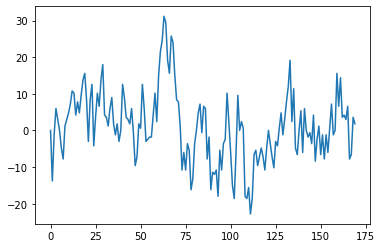

In [9]:
plt.plot(np.arange(170),frame_of_1[0][0])

In [10]:
low_pass_filter = design_filter(8, 200, 5)

In [11]:
f_signal_1 = apply_filter(low_pass_filter, frame_of_1)
f_signal_2 = apply_filter(low_pass_filter, frame_of_2)
f_signal_3 = apply_filter(low_pass_filter, frame_of_3)

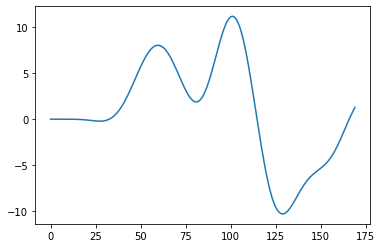

In [12]:
plt.plot(np.arange(170),f_signal_1[0][0])

In [13]:
transformed_frame_of_1 = fourier_trans(f_signal_1)
transformed_frame_of_2 = fourier_trans(f_signal_2)
transformed_frame_of_3 = fourier_trans(f_signal_3)

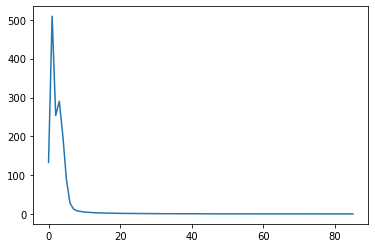

In [14]:
plt.plot(abs(transformed_frame_of_1[0][0]))

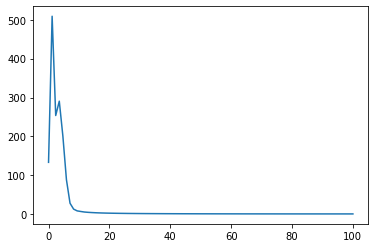

In [15]:
yf = transformed_frame_of_1[0][0]
v = np.arange(86)
t = 170/200.0
xf = v/t

fig, ax = plt.subplots()
ax.plot(xf, abs(yf))
plt.show()


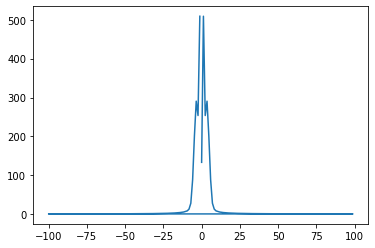

In [16]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = fft.fftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

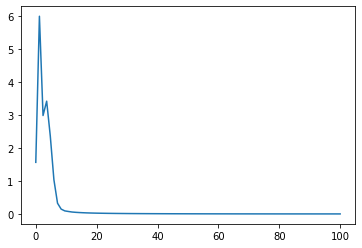

In [17]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = np.linspace(0.0, 1.0/(2.0*(1.0/200.0)), 85)
                 
fig, ax = plt.subplots()
ax.plot(xf, (2.0/170) * np.abs(yf[0:85]))
plt.show()

In [18]:
transformed_frame_of_1 = remove_phase_shift(transformed_frame_of_1)
transformed_frame_of_2 = remove_phase_shift(transformed_frame_of_2)
transformed_frame_of_3 = remove_phase_shift(transformed_frame_of_3)

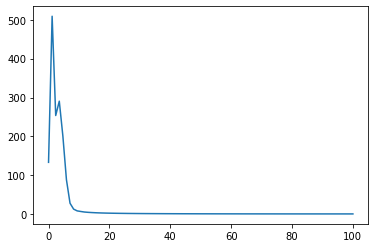

In [19]:
yf = transformed_frame_of_1[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

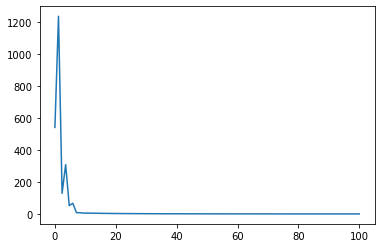

In [20]:
yf = transformed_frame_of_2[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

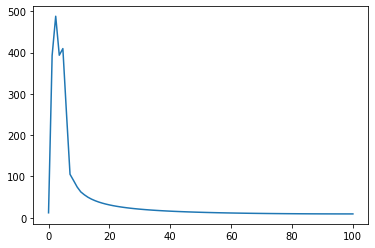

In [21]:
yf = transformed_frame_of_3[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

In [22]:
all_trials_of_1 = extract_features(transformed_frame_of_1)
all_trials_of_2 = extract_features(transformed_frame_of_2)
all_trials_of_3 = extract_features(transformed_frame_of_3)

In [23]:
print(all_trials_of_1.shape)
print(all_trials_of_2.shape)
print(all_trials_of_3.shape)

(289, 189)
(327, 189)
(284, 189)


In [24]:
trials_sets = [all_trials_of_1, all_trials_of_2, all_trials_of_3]
class_labels = [1, 2, 3]
dataset = create_dataset(trials_sets, class_labels)

In [25]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,1.333233e+02,-3.951829e+02,-3.206725e+02,2.192320e+02,-1.276870e+02,2.002779e+02,2.105060e+02,-1.684008e+02,-1.097830e+02,2.030456e+02,...,-1.523644e+02,-5.061767e+01,-3.428006e+01,1.088685e+02,-7.414298e+01,1.229984e+01,-9.757946e+00,9.755409e+00,2.082776e+01,1
1,-4.249005e-76,4.218955e-27,-1.790195e-26,5.052471e-02,-1.974817e-02,7.928239e-14,4.365613e-13,-3.289360e-138,2.968595e-139,-4.418262e-76,...,1.406481e-76,-5.272645e-120,5.507473e-120,-3.534495e-48,-2.263164e-48,-8.590548e-25,-7.391418e-24,9.806915e-01,2.397849e+00,1
2,6.704144e+02,-7.264173e-05,-1.042459e-04,3.135817e-18,8.763798e-19,2.423030e-07,5.605944e-07,5.033216e-48,-3.270632e-48,1.092715e+02,...,-1.875475e+02,-1.890315e-07,-2.702959e-07,-7.627075e-48,-4.769753e-48,2.030248e-02,-2.175795e-02,1.116670e-52,-1.820541e-52,1
3,1.139780e+03,-8.975985e-10,-1.884819e-10,-1.443137e-52,-6.643539e-53,4.697246e-06,2.564722e-06,9.735044e-44,-9.282512e-44,4.578123e+02,...,6.444420e-77,-4.735424e-125,3.248380e-125,1.469371e-17,-6.172572e-17,2.054551e-22,-7.760480e-21,5.618163e-25,4.757264e-26,1
4,-4.879283e-76,-6.696091e-18,-5.346614e-17,3.015551e-19,9.451781e-20,-3.069639e-82,-2.036983e-82,9.117520e-34,-2.143647e-33,-3.202739e-76,...,2.673062e-76,-6.168320e-127,3.533265e-127,5.163702e-24,-2.002391e-22,1.888514e-01,-1.273112e-01,-3.886308e-23,7.168544e-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,8.160103e+02,3.369514e-62,-9.834204e-63,2.976433e-30,1.391032e-30,1.028572e-22,7.814110e-23,3.361297e-05,4.433746e-05,1.038169e+03,...,8.992873e+00,-2.258477e-98,-2.094776e-99,-3.097044e-101,-4.440353e-101,-6.500338e-119,-8.079043e-120,-3.334961e-119,-6.570855e-119,3
896,-6.454930e-76,-1.459900e-30,-3.280767e-29,-8.473584e-22,-3.689807e-21,1.121079e+01,-3.319648e+00,1.703511e+02,1.240620e+02,-6.205268e-77,...,2.538225e+01,-5.813649e-21,1.979585e-20,-4.453816e-96,-1.031374e-95,-4.994613e-111,-2.244643e-111,-9.409541e-117,-2.451284e-116,3
897,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109,3
898,-8.833328e-76,2.124004e-44,-3.695109e-44,1.101446e-14,-1.437583e-13,1.061543e-25,-6.819383e-25,5.509879e-07,7.476768e-07,-2.672413e-76,...,-2.327198e-77,3.463369e-58,-1.933509e-57,2.035699e-47,-6.668103e-49,-1.145908e-09,1.472186e-09,2.037723e-38,5.850633e-38,3


In [26]:
f2 = "csvDatasets/" + file_name + ".csv"
dataset.to_csv(f2)
# !cp dataset.csv "/content/drive/MyDrive/IIT Delhi/HSL622_termPaper"

Apply different ML classification algorithms to dataset present in "dataset"
few implemented algorithms are here https://github.com/mrzResearchArena/MI-EEG/tree/master/Machine-Learning

In [27]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [28]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,6.668082e+02,-1.695469e-09,-3.544297e-09,1.014611e-47,7.106629e-47,5.188904e-12,2.156118e-11,-1.826036e-08,-3.248780e-09,3.380735e+02,...,-6.115749e+01,-9.414594e-10,-1.541395e-10,-2.382286e-32,-6.198004e-32,2.818072e-52,1.987865e-51,9.706677e-58,-2.520193e-57,1
1,-6.226801e-75,4.453153e-68,1.804469e-68,7.013827e-08,-9.634985e-08,-3.676030e-66,-1.001351e-65,-9.155489e-114,1.647757e-113,-5.577280e-75,...,7.497380e-76,8.746765e-97,4.364355e-96,-2.253734e-66,3.576287e-66,1.717160e-46,5.023628e-46,-6.488682e-29,6.786756e-29,1
2,3.693942e+03,1.469204e-77,5.449699e-78,2.380011e-34,1.692094e-34,2.517108e-30,3.662622e-30,4.377309e-13,1.297703e-12,3.392622e+03,...,-1.607978e-77,-6.253206e-30,8.166744e-30,-5.728147e-103,-6.876811e-103,-1.009635e-113,-3.275330e-114,-1.650857e-126,-1.691168e-126,3
3,-8.458635e-76,-2.230276e-18,-1.861589e-17,5.179621e+00,-2.444740e+00,8.634752e-29,-3.717157e-29,-1.376323e-104,1.397611e-103,-9.771233e-76,...,1.618081e-76,-1.158439e-02,-5.188563e-03,-1.995222e-87,3.360157e-88,-1.888566e-23,-4.142928e-22,5.044488e-44,-4.090115e-44,1
4,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109,3
5,5.846015e+02,-2.239370e-18,-4.208785e-18,8.852659e-49,1.973813e-48,-2.707745e-48,3.604120e-46,-5.899725e-62,-1.680865e-61,7.395902e+02,...,-2.410793e-76,4.306656e-58,-2.181553e-57,1.667252e-73,-2.985850e-73,2.047263e-64,-2.335563e-64,-3.933805e-29,7.627229e-28,3
6,-2.105693e-75,4.662736e-66,-6.195979e-67,4.701131e-07,-1.285994e-06,-9.150638e-31,-2.770389e-29,2.221660e-11,2.615663e-12,-2.113359e-75,...,-5.205977e-77,-6.455572e-86,-4.374334e-86,-1.574847e-97,-3.145375e-97,-9.308537e-94,-1.995549e-93,2.277090e-73,-4.751922e-74,3
7,-7.310937e-77,-1.931916e+02,-2.419751e+02,-1.971894e-56,-2.982614e-56,7.294974e-11,-1.669009e-12,5.310145e-35,-1.798316e-34,3.945275e+02,...,3.633178e+02,5.099797e-82,-6.790824e-82,-2.626973e-99,9.026879e-99,2.652088e-13,5.963449e-13,-1.848158e-01,3.284608e-02,2
8,3.522581e+02,-9.450339e+00,-1.054125e+01,1.791709e-03,7.351699e-04,6.135738e-05,1.439940e-05,7.551271e-31,4.187962e-30,8.275680e+02,...,1.058545e+01,4.834160e-28,1.394897e-27,3.387261e-22,-1.099440e-21,1.841216e-03,1.757468e-03,-8.521850e-01,1.302461e-01,2
9,-1.622929e-76,3.712947e-88,3.371100e-88,-2.898035e-64,1.831198e-63,-6.122873e-54,-3.894292e-54,-1.455239e-57,-1.207848e-56,-2.525847e-76,...,2.173627e+02,-1.989525e-42,8.499370e-43,-6.795864e-98,-1.279499e-97,-5.175449e-86,-5.958440e-85,3.903794e-105,-3.052017e-104,3


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train, test = train_test_split(dataset, test_size=0.2, shuffle=False, random_state=0)

In [31]:
train

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,6.668082e+02,-1.695469e-09,-3.544297e-09,1.014611e-47,7.106629e-47,5.188904e-12,2.156118e-11,-1.826036e-08,-3.248780e-09,3.380735e+02,...,-6.115749e+01,-9.414594e-10,-1.541395e-10,-2.382286e-32,-6.198004e-32,2.818072e-52,1.987865e-51,9.706677e-58,-2.520193e-57,1
1,-6.226801e-75,4.453153e-68,1.804469e-68,7.013827e-08,-9.634985e-08,-3.676030e-66,-1.001351e-65,-9.155489e-114,1.647757e-113,-5.577280e-75,...,7.497380e-76,8.746765e-97,4.364355e-96,-2.253734e-66,3.576287e-66,1.717160e-46,5.023628e-46,-6.488682e-29,6.786756e-29,1
2,3.693942e+03,1.469204e-77,5.449699e-78,2.380011e-34,1.692094e-34,2.517108e-30,3.662622e-30,4.377309e-13,1.297703e-12,3.392622e+03,...,-1.607978e-77,-6.253206e-30,8.166744e-30,-5.728147e-103,-6.876811e-103,-1.009635e-113,-3.275330e-114,-1.650857e-126,-1.691168e-126,3
3,-8.458635e-76,-2.230276e-18,-1.861589e-17,5.179621e+00,-2.444740e+00,8.634752e-29,-3.717157e-29,-1.376323e-104,1.397611e-103,-9.771233e-76,...,1.618081e-76,-1.158439e-02,-5.188563e-03,-1.995222e-87,3.360157e-88,-1.888566e-23,-4.142928e-22,5.044488e-44,-4.090115e-44,1
4,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-7.133785e-76,-1.075055e-08,-2.064762e-08,5.121377e-24,-1.004464e-22,1.349210e-35,-1.112455e-35,5.805281e-64,3.779794e-65,-1.983598e-76,...,8.086938e-77,-6.521426e-123,5.378498e-123,-4.528963e-53,-1.746460e-53,-2.528894e-33,-4.872140e-33,-1.380640e-98,-3.909398e-99,1
716,-4.761799e-76,-2.298938e-10,-1.113415e-09,4.477250e-29,-7.917406e-29,1.520801e-12,2.557499e-12,-4.812878e-47,-2.115970e-46,-4.106668e-76,...,2.512017e+02,-3.226085e-14,1.392924e-13,-7.135711e+00,-9.151486e+00,2.154261e-43,-5.412026e-43,5.366070e-70,1.202748e-70,2
717,-1.209261e-75,1.427327e-69,1.030926e-69,1.926059e-18,-1.447426e-18,-8.116902e-62,-1.506385e-61,-6.596973e-47,1.313289e-46,-9.739234e-76,...,3.124439e+02,-1.313379e-116,-1.422154e-116,-6.808575e-123,2.308382e-123,3.865903e-11,7.066709e-11,-5.780467e-129,-8.916164e-129,2
718,-1.517515e-75,5.274610e-73,8.690943e-74,4.720569e-18,-2.497981e-19,2.530889e-02,-4.661234e-03,1.215101e-02,1.305992e-02,-1.516052e-75,...,1.124158e+02,1.533422e-02,1.579236e-02,-2.648290e-18,1.151496e-18,-3.398445e-107,-2.216739e-107,1.123204e-107,-2.645047e-106,3


In [32]:
test = test.reset_index(drop=True)

In [33]:
test

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,3.593688e+02,-5.456178e-04,-2.605996e-04,-1.571689e-38,-2.628046e-38,2.445257e-55,-1.875435e-54,1.068726e-59,-1.059530e-60,4.599835e+02,...,3.997473e-76,-4.285114e-135,8.693187e-136,2.099330e-50,1.692574e-49,-2.870769e-64,7.217798e-64,-5.133756e-87,-4.676280e-87,1
1,-2.567170e-76,-4.631603e-112,7.963715e-112,1.303834e-13,-2.819202e-13,3.830168e-29,-1.756795e-29,2.159153e-95,8.128064e-95,-1.539671e-76,...,1.170221e-76,2.329324e-86,3.493582e-86,-1.077423e-62,2.565145e-62,-1.228789e-92,4.601820e-94,-1.654776e-88,-1.294095e-88,1
2,9.383965e+02,6.496916e-76,1.826273e-76,6.579253e-28,2.390497e-28,4.187052e-18,2.126818e-18,1.017863e-07,1.683314e-07,7.515967e+02,...,-1.435912e-76,-1.291577e-80,-1.330478e-80,-1.544684e-118,-4.120164e-119,-7.160507e-99,-9.400457e-99,-8.625647e-123,-1.208445e-122,3
3,5.030667e+03,1.915799e-81,1.087732e-81,4.513685e-46,8.550859e-46,-2.641797e-48,2.895873e-47,-3.593596e-34,6.164213e-34,4.083558e+03,...,-3.015311e-76,4.883058e-61,-7.271003e-60,-1.503436e-89,-1.266861e-88,-2.030903e-92,-5.267643e-92,3.221929e-89,-3.601855e-89,3
4,-3.304967e-77,1.900251e-32,-2.316071e-32,1.062959e-14,1.129957e-14,4.333131e-07,4.509274e-07,2.398624e-15,2.325229e-15,3.948131e+02,...,3.098225e+02,2.785611e-88,-6.531620e-88,-2.509661e-114,1.997071e-114,3.651667e-13,8.221484e-13,-1.214995e-119,-7.917653e-119,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3.639018e+03,1.279077e-76,4.234456e-77,2.353994e-34,1.682578e-34,2.629061e-33,5.016211e-33,2.736131e-18,2.062907e-17,3.194424e+03,...,-4.975225e-76,9.844074e-54,-2.731795e-53,-8.620985e-107,-7.432299e-107,-1.469258e-94,-2.797716e-94,1.428593e-109,-4.966956e-107,3
176,4.995938e+02,-1.868868e-01,-2.001120e-01,7.287659e-03,-2.641052e-03,1.102811e+02,1.198934e+02,-1.277346e-116,1.873012e-116,-1.559252e-76,...,3.408122e-76,-1.397948e-06,-3.627409e-07,-4.049912e-60,1.458143e-59,4.268858e-12,-1.069007e-11,-3.658917e-73,-1.343538e-72,1
177,-5.069254e-76,5.285870e-68,1.974000e-68,2.353824e-13,2.034323e-14,-3.472911e-31,5.606585e-31,-1.314888e-121,1.244979e-121,-5.857127e-76,...,-6.034394e+01,-1.822185e-06,-4.946131e-07,-6.532477e-34,-1.379978e-33,1.147288e-17,-7.066183e-17,1.691055e-34,-5.376113e-35,1
178,5.471677e+01,-2.761631e-07,-1.627232e-07,-4.026148e-44,-7.994508e-43,1.077941e-06,1.468020e-07,-3.201690e-64,1.313129e-64,-9.341272e-77,...,5.973332e+02,-5.663269e-132,-1.006728e-132,4.256316e-74,4.750256e-74,-3.357267e-76,-2.402192e-76,-1.793362e-136,-1.474089e-136,2


In [34]:
X_train = train[train.columns[:-1]]
y_train = train['label']

X_test = test[test.columns[:-1]]
y_test = test['label']

In [35]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,6.668082e+02,-1.695469e-09,-3.544297e-09,1.014611e-47,7.106629e-47,5.188904e-12,2.156118e-11,-1.826036e-08,-3.248780e-09,3.380735e+02,...,1.082319e-42,-6.115749e+01,-9.414594e-10,-1.541395e-10,-2.382286e-32,-6.198004e-32,2.818072e-52,1.987865e-51,9.706677e-58,-2.520193e-57
1,-6.226801e-75,4.453153e-68,1.804469e-68,7.013827e-08,-9.634985e-08,-3.676030e-66,-1.001351e-65,-9.155489e-114,1.647757e-113,-5.577280e-75,...,-4.068900e+01,7.497380e-76,8.746765e-97,4.364355e-96,-2.253734e-66,3.576287e-66,1.717160e-46,5.023628e-46,-6.488682e-29,6.786756e-29
2,3.693942e+03,1.469204e-77,5.449699e-78,2.380011e-34,1.692094e-34,2.517108e-30,3.662622e-30,4.377309e-13,1.297703e-12,3.392622e+03,...,-3.849518e-13,-1.607978e-77,-6.253206e-30,8.166744e-30,-5.728147e-103,-6.876811e-103,-1.009635e-113,-3.275330e-114,-1.650857e-126,-1.691168e-126
3,-8.458635e-76,-2.230276e-18,-1.861589e-17,5.179621e+00,-2.444740e+00,8.634752e-29,-3.717157e-29,-1.376323e-104,1.397611e-103,-9.771233e-76,...,-2.103255e-33,1.618081e-76,-1.158439e-02,-5.188563e-03,-1.995222e-87,3.360157e-88,-1.888566e-23,-4.142928e-22,5.044488e-44,-4.090115e-44
4,-2.440752e-76,-7.431783e+01,-1.744032e+01,1.384663e-09,-5.263277e-09,1.020750e-15,-1.748020e-15,1.393947e-19,-3.017071e-20,-1.998171e-76,...,3.943420e-113,2.555589e+00,-1.366264e-67,-5.903653e-67,-2.557043e-17,1.285087e-17,-9.322752e-11,1.088560e-10,-3.908467e-110,-5.071616e-109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-7.133785e-76,-1.075055e-08,-2.064762e-08,5.121377e-24,-1.004464e-22,1.349210e-35,-1.112455e-35,5.805281e-64,3.779794e-65,-1.983598e-76,...,1.317134e-46,8.086938e-77,-6.521426e-123,5.378498e-123,-4.528963e-53,-1.746460e-53,-2.528894e-33,-4.872140e-33,-1.380640e-98,-3.909398e-99
716,-4.761799e-76,-2.298938e-10,-1.113415e-09,4.477250e-29,-7.917406e-29,1.520801e-12,2.557499e-12,-4.812878e-47,-2.115970e-46,-4.106668e-76,...,-5.371535e-05,2.512017e+02,-3.226085e-14,1.392924e-13,-7.135711e+00,-9.151486e+00,2.154261e-43,-5.412026e-43,5.366070e-70,1.202748e-70
717,-1.209261e-75,1.427327e-69,1.030926e-69,1.926059e-18,-1.447426e-18,-8.116902e-62,-1.506385e-61,-6.596973e-47,1.313289e-46,-9.739234e-76,...,6.996995e-129,3.124439e+02,-1.313379e-116,-1.422154e-116,-6.808575e-123,2.308382e-123,3.865903e-11,7.066709e-11,-5.780467e-129,-8.916164e-129
718,-1.517515e-75,5.274610e-73,8.690943e-74,4.720569e-18,-2.497981e-19,2.530889e-02,-4.661234e-03,1.215101e-02,1.305992e-02,-1.516052e-75,...,1.386074e-127,1.124158e+02,1.533422e-02,1.579236e-02,-2.648290e-18,1.151496e-18,-3.398445e-107,-2.216739e-107,1.123204e-107,-2.645047e-106


In [36]:
y_train

0      1
1      1
2      3
3      1
4      3
      ..
715    1
716    2
717    2
718    3
719    3
Name: label, Length: 720, dtype: int64

In [37]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,3.593688e+02,-5.456178e-04,-2.605996e-04,-1.571689e-38,-2.628046e-38,2.445257e-55,-1.875435e-54,1.068726e-59,-1.059530e-60,4.599835e+02,...,6.907914e-88,3.997473e-76,-4.285114e-135,8.693187e-136,2.099330e-50,1.692574e-49,-2.870769e-64,7.217798e-64,-5.133756e-87,-4.676280e-87
1,-2.567170e-76,-4.631603e-112,7.963715e-112,1.303834e-13,-2.819202e-13,3.830168e-29,-1.756795e-29,2.159153e-95,8.128064e-95,-1.539671e-76,...,1.954668e-43,1.170221e-76,2.329324e-86,3.493582e-86,-1.077423e-62,2.565145e-62,-1.228789e-92,4.601820e-94,-1.654776e-88,-1.294095e-88
2,9.383965e+02,6.496916e-76,1.826273e-76,6.579253e-28,2.390497e-28,4.187052e-18,2.126818e-18,1.017863e-07,1.683314e-07,7.515967e+02,...,-4.364109e-54,-1.435912e-76,-1.291577e-80,-1.330478e-80,-1.544684e-118,-4.120164e-119,-7.160507e-99,-9.400457e-99,-8.625647e-123,-1.208445e-122
3,5.030667e+03,1.915799e-81,1.087732e-81,4.513685e-46,8.550859e-46,-2.641797e-48,2.895873e-47,-3.593596e-34,6.164213e-34,4.083558e+03,...,-7.944708e-45,-3.015311e-76,4.883058e-61,-7.271003e-60,-1.503436e-89,-1.266861e-88,-2.030903e-92,-5.267643e-92,3.221929e-89,-3.601855e-89
4,-3.304967e-77,1.900251e-32,-2.316071e-32,1.062959e-14,1.129957e-14,4.333131e-07,4.509274e-07,2.398624e-15,2.325229e-15,3.948131e+02,...,-3.910445e-21,3.098225e+02,2.785611e-88,-6.531620e-88,-2.509661e-114,1.997071e-114,3.651667e-13,8.221484e-13,-1.214995e-119,-7.917653e-119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,3.639018e+03,1.279077e-76,4.234456e-77,2.353994e-34,1.682578e-34,2.629061e-33,5.016211e-33,2.736131e-18,2.062907e-17,3.194424e+03,...,-9.944371e+00,-4.975225e-76,9.844074e-54,-2.731795e-53,-8.620985e-107,-7.432299e-107,-1.469258e-94,-2.797716e-94,1.428593e-109,-4.966956e-107
176,4.995938e+02,-1.868868e-01,-2.001120e-01,7.287659e-03,-2.641052e-03,1.102811e+02,1.198934e+02,-1.277346e-116,1.873012e-116,-1.559252e-76,...,-1.680179e-11,3.408122e-76,-1.397948e-06,-3.627409e-07,-4.049912e-60,1.458143e-59,4.268858e-12,-1.069007e-11,-3.658917e-73,-1.343538e-72
177,-5.069254e-76,5.285870e-68,1.974000e-68,2.353824e-13,2.034323e-14,-3.472911e-31,5.606585e-31,-1.314888e-121,1.244979e-121,-5.857127e-76,...,-2.566693e-11,-6.034394e+01,-1.822185e-06,-4.946131e-07,-6.532477e-34,-1.379978e-33,1.147288e-17,-7.066183e-17,1.691055e-34,-5.376113e-35
178,5.471677e+01,-2.761631e-07,-1.627232e-07,-4.026148e-44,-7.994508e-43,1.077941e-06,1.468020e-07,-3.201690e-64,1.313129e-64,-9.341272e-77,...,1.122361e-75,5.973332e+02,-5.663269e-132,-1.006728e-132,4.256316e-74,4.750256e-74,-3.357267e-76,-2.402192e-76,-1.793362e-136,-1.474089e-136


In [38]:
y_test

0      1
1      1
2      3
3      3
4      2
      ..
175    3
176    1
177    1
178    2
179    2
Name: label, Length: 180, dtype: int64

In [39]:
np.array(X_test).shape

(180, 189)

# SVM (Support vector machine)

In [40]:
train_acc, test_acc, predicted_test, confusion, report = SVM_ml(X_train, y_train, X_test, y_test)

In [41]:
print(train_acc)
print(test_acc)

0.9944444444444445
0.9944444444444445


In [42]:
print(confusion)

[[61  1  0]
 [ 0 55  0]
 [ 0  0 63]]


In [43]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        62
           2       0.98      1.00      0.99        55
           3       1.00      1.00      1.00        63

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Decision Tree

In [44]:
train_acc, test_acc, predicted_test, confusion, report = dTree_ml(X_train, y_train, X_test, y_test)

In [45]:
print(train_acc)
print(test_acc)

0.9805555555555555
0.95


In [46]:
print(confusion)

[[55  7  0]
 [ 0 55  0]
 [ 1  1 61]]


In [47]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.89      0.93        62
           2       0.87      1.00      0.93        55
           3       1.00      0.97      0.98        63

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.96      0.95      0.95       180



# Random Forest

In [48]:
train_acc, test_acc, predicted_test, confusion, report = rforest_ml(X_train, y_train, X_test, y_test)

In [49]:
print(train_acc)
print(test_acc)

1.0
1.0


In [50]:
print(confusion)

[[62  0  0]
 [ 0 55  0]
 [ 0  0 63]]


In [51]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        63

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# AdaBoosting

In [52]:
train_acc, test_acc, predicted_test, confusion, report = adaBoost_ml(X_train, y_train, X_test, y_test)

In [53]:
print(train_acc)
print(test_acc)

0.9458333333333333
0.9611111111111111


In [54]:
print(confusion)

[[56  2  4]
 [ 0 55  0]
 [ 0  1 62]]


In [55]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        62
           2       0.95      1.00      0.97        55
           3       0.94      0.98      0.96        63

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



# Bagging

In [56]:
train_acc, test_acc, predicted_test, confusion, report = bagging_ml(X_train, y_train, X_test, y_test)

In [57]:
print(train_acc)
print(test_acc)

0.9986111111111111
0.9722222222222222


In [58]:
print(confusion)

[[59  3  0]
 [ 0 55  0]
 [ 1  1 61]]


In [59]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.95      0.97        62
           2       0.93      1.00      0.96        55
           3       1.00      0.97      0.98        63

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



# NB_classifier

## Gaussian_NB

In [60]:
train_acc, test_acc, predicted_test, confusion, report = gaussianNB_ml(X_train, y_train, X_test, y_test)

In [61]:
print(train_acc)
print(test_acc)

0.7388888888888889
0.65


In [62]:
print(confusion)

[[31 27  4]
 [ 4 45  6]
 [ 2 20 41]]


In [63]:
print(report)

              precision    recall  f1-score   support

           1       0.84      0.50      0.63        62
           2       0.49      0.82      0.61        55
           3       0.80      0.65      0.72        63

    accuracy                           0.65       180
   macro avg       0.71      0.66      0.65       180
weighted avg       0.72      0.65      0.65       180



## Bernoulli_NB

In [64]:
train_acc, test_acc, predicted_test, confusion, report = bernoulliNB_ml(X_train, y_train, X_test, y_test)

In [65]:
print(train_acc)
print(test_acc)

0.75
0.7277777777777777


In [66]:
print(confusion)

[[46 10  6]
 [ 9 38  8]
 [10  6 47]]


In [67]:
print(report)

              precision    recall  f1-score   support

           1       0.71      0.74      0.72        62
           2       0.70      0.69      0.70        55
           3       0.77      0.75      0.76        63

    accuracy                           0.73       180
   macro avg       0.73      0.73      0.73       180
weighted avg       0.73      0.73      0.73       180



# MLP (Multi Layer perceptron) classifier

In [68]:
train_acc, test_acc, predicted_test, confusion, report = MLP_ml(X_train, y_train, X_test, y_test)

In [69]:
print(train_acc)
print(test_acc)

1.0
0.9944444444444445


In [70]:
print(confusion)

[[62  0  0]
 [ 1 54  0]
 [ 0  0 63]]


In [71]:
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        62
           2       1.00      0.98      0.99        55
           3       1.00      1.00      1.00        63

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Quadratic Discriminant Analysis

In [72]:
train_acc, test_acc, predicted_test, confusion, report = QDA_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [73]:
print(train_acc)
print(test_acc)

0.9972222222222222
0.85


In [74]:
print(confusion)

[[50 11  1]
 [ 0 55  0]
 [ 5 10 48]]


In [75]:
print(report)

              precision    recall  f1-score   support

           1       0.91      0.81      0.85        62
           2       0.72      1.00      0.84        55
           3       0.98      0.76      0.86        63

    accuracy                           0.85       180
   macro avg       0.87      0.86      0.85       180
weighted avg       0.88      0.85      0.85       180



# KNN

In [76]:
train_acc, test_acc, predicted_test, confusion, report = KNN_ml(X_train, y_train, X_test, y_test)

In [77]:
print(train_acc)
print(test_acc)

0.9847222222222223
0.9833333333333333


In [78]:
print(confusion)

[[61  0  1]
 [ 1 53  1]
 [ 0  0 63]]


In [79]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        62
           2       1.00      0.96      0.98        55
           3       0.97      1.00      0.98        63

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180

